# Modules

In [6]:
!pip install scikit-learn==0.24.2

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [53 lines of output]
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "D:\Danu\project_Ex\venv\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "D:\Danu\project_Ex\venv\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\

In [7]:
from graphviz import *
from sklearn.datasets import load_boston, load_breast_cancer

from collections import Counter
from itertools import chain, combinations
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import copy
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import graphviz
import seaborn as sns

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


# Helper Tools

In [ ]:
class Node:
    def __init__(self,nodeId, label, isRoot=False,parentNode=None,
               leftNode=None,rightNode=None,isTerminal=False, 
                 attr={}):
        self.nodeId = nodeId ## 노드 식별 아이디
        self.label = label ## 노드 텍스트
        self.attr = attr ## 노드 스타일 속성
        self.isRoot = isRoot ## 루트 노드 여부
        self.parentNode = parentNode ## 부모 마디(노드)
        self.leftNode = leftNode ## 왼쪽 자식 노드(마디)
        self.rightNode = rightNode ## 오른쪽 자식 노드
        self.isTerminal = isTerminal ## 터미널 노드 여부
        self.level = 0 ## 노드가 속한 층
        
def visualize_tree(tree):
    def add_node_edge(tree, dot=None):
        if dot is None:
            dot = Digraph()
#             name = tree
            dot.node(name = str(tree.nodeId), label = str(tree.label), **tree.attr)

        ## left
        if tree.leftNode:
            dot.node(name=str(tree.leftNode.nodeId),label=str(tree.leftNode.label),
                     **tree.leftNode.attr) 
            dot.edge(str(tree.nodeId), str(tree.leftNode.nodeId),
                     **{'taillabel':"yes",'labeldistance':'2.5'})
            dot = add_node_edge(tree.leftNode, dot)
            
        if tree.rightNode:
            dot.node(name=str(tree.rightNode.nodeId),label=str(tree.rightNode.label),
                     **tree.rightNode.attr)
            dot.edge(str(tree.nodeId), str(tree.rightNode.nodeId),
                    **{'headlabel':" no",'labeldistance':'2'})
            dot = add_node_edge(tree.rightNode, dot)

        return dot
        
    dot = add_node_edge(tree)
    
    return dot

def RGBtoHex(vals, rgbtype=1):
    """Converts RGB values in a variety of formats to Hex values.

     @param  vals     An RGB/RGBA tuple
     @param  rgbtype  Valid valus are:
                          1 - Inputs are in the range 0 to 1
                        256 - Inputs are in the range 0 to 255

     @return A hex string in the form '#RRGGBB' or '#RRGGBBAA'
    """

    if len(vals)!=3 and len(vals)!=4:
        raise Exception("RGB or RGBA inputs to RGBtoHex must have three or four elements!")
    if rgbtype!=1 and rgbtype!=256:
        raise Exception("rgbtype must be 1 or 256!")

    #Convert from 0-1 RGB/RGBA to 0-255 RGB/RGBA
    if rgbtype==1:
        vals = [255*x for x in vals]

    #Ensure values are rounded integers, convert to hex, and concatenate
    return '#' + ''.join(['{:02X}'.format(int(round(x))) for x in vals])

def is_integer_num(n):
    if isinstance(n, int):
        return True
    if isinstance(n, float):
        return n.is_integer()
    return False

class DecisionTree:
    def __init__(self, tree_type='classification',):
        tree_types = ['classification','regression']
        assert tree_type in tree_types, f'tree_type must be the one of the {tree_types}'
        self.tree_type = tree_type ## 트리 유형
        self.impurity_measure = None ## 불순도 측도
        self.root = None ## 트리 노드
        self.node_id = 0 ## 노드 아이디
        self.col_names = None ## 칼럼 이름
        self.col_types = None ## 변수 타입
        self.X = None ## train data X
        self.y = None ## train data y
        self.leaf_attr = None ## 끝마디 스타일 속성
    
    def traverseInOrder(self, node):
        res = []
        if node.leftNode != None:
            res = res + self.traverseInOrder(node.leftNode)
        res.append(node)
        if node.rightNode != None:
            res = res + self.traverseInOrder(node.rightNode)
        return res
    
    def getDepth(self, root):
        res = self.traverseInOrder(root)
        res = [abs(node.level) for node in res]
        return max(res)
    
    def getLevel(self, node, counter = 1):
        if node.parentNode is None:
            return counter
        else:
            counter += 1
            counter = self.getLevel(node.parentNode,counter)
        return counter
    
    def determineTypeOfCol(self,X, num_unique_values_threshold=15):
        col_types = []
        for col in X.columns:
            unique_values = X[col].unique()
            example_value = unique_values[0]
            
            if (isinstance(example_value, str)) or (len(unique_values) <= num_unique_values_threshold):
                col_types.append('categorical')
            else:
                col_types.append('continuous')
        self.col_types = col_types

    def isPure(self,y):
        if len(np.unique(y)) > 1:
            return False
        return True
    
    def impurity(self, left_y, right_y):
#         impurity_val = 'no'
#         if self.impurity_measure == 'entropy':
#             n = len(left_y)+len(right_y)
#             pl, pr = len(left_y)/n, len(right_y)/n
#             impurity_val = pl*self.individualImpurity(left_y)+\
#                             pr*self.individualImpurity(right_y)
#         elif self.impurity_measure == 'gini':
#             n = len(left_y)+len(right_y)
#             pl, pr = len(left_y)/n, len(right_y)/n
#             impurity_val = pl*self.individualImpurity(left_y)+\
#                             pr*self.individualImpurity(right_y)
#         elif self.impurity_measure == 'mse':
        y = self.y
        n = len(left_y)+len(right_y)
        
        if self.impurity_measure == 'chi2':
            try:
                label = np.unique(y)
                contingency_table = dict()
                expected_table = dict()
                for l in label:
                    temp1 = []
                    temp1.append(np.sum(left_y==l))
                    temp1.append(np.sum(right_y==l))
                    contingency_table[l] = temp1
                    temp2 = []
                    temp2.append((np.sum(left_y==l) + np.sum(right_y==l))*len(left_y)/n)
                    temp2.append((np.sum(left_y==l) + np.sum(right_y==l))*len(right_y)/n)
                    expected_table[l] = temp2

                observed = np.array([v for k,v in contingency_table.items()]).flatten()
                expected = np.array([v for k,v in expected_table.items()]).flatten()
                impurity_val = np.nansum(np.square(observed-expected)/expected)
            except RuntimeWarning:
                raise
        else:
            pl, pr = len(left_y)/n, len(right_y)/n
            impurity_val = pl*self.individualImpurity(left_y)+\
                            pr*self.individualImpurity(right_y)
        return impurity_val
            
    def individualImpurity(self, y):
        if self.impurity_measure == 'entropy':
            return self._entropy(y)
        elif self.impurity_measure == 'gini':
            return self._gini(y)
        elif self.impurity_measure == 'mse':
            return self._mse(y)
    
    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        ps = counts / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])
    
    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        ps = counts / len(y)
        return np.sum([p*(1-p) for p in ps if p > 0])
    
    def _mse(self, y):
        if len(y) == 0:
            return 0
        mse = np.mean(np.square(y-np.mean(y)))
        return mse
    
    def createLeaf(self, y, tree_type):
        if tree_type == 'classification':
            classes, counts = np.unique(y, return_counts=True)
            index = counts.argmax()
            return classes[index]
        else:
            return np.mean(y)
    
    def powerset_generator(self, i):
        for subset in chain.from_iterable(combinations(i, r) for r in range(len(i)+1)):
            yield set(subset)
        
    def splitSet(self, x):
        ps = [i for i in self.powerset_generator(x) if i != set() and len(i) != len(x)]
        idx = int(len(ps)/2)
        split_set = []
        for j in range(idx):
            split_set.append(tuple(ps[j]))
        return split_set
        
    def getPotentialSplits(self,X):
        potential_splits = {}
        col_types = self.col_types
        for col_idx in range(X.shape[1]):
            unique_value = np.unique(X[:,col_idx])
            if col_types[col_idx] == 'continuous':
                potential_splits[col_idx] = unique_value
            else:
                potential_splits[col_idx] = self.splitSet(unique_value)
        return potential_splits
    
    def split(self, X, col_idx, threshold):
        X_col = X[:,col_idx]
        col_types = self.col_types
        if col_types[col_idx] == 'continuous':
            left_idx = np.argwhere(X_col<=threshold).flatten()
            right_idx = np.argwhere(X_col>threshold).flatten()
        else:
            left_idx = np.argwhere(np.isin(X_col,threshold)).flatten()
            right_idx = np.argwhere(~np.isin(X_col,threshold)).flatten()
        return left_idx, right_idx
    
    def determinBestSplit(self, X, y, potential_splits):
        best_split_column, best_split_value, opt_impurity = '', '', ''
        if self.impurity_measure in ['entropy','gini','mse']: 
            opt_impurity = np.infty
            for col in potential_splits:
                for val in potential_splits[col]:
                    left_idx, right_idx = self.split(X,col,val)
                    cur_impurity = self.impurity(y[left_idx],y[right_idx])
                    if cur_impurity <= opt_impurity:
                        opt_impurity = cur_impurity
                        best_split_column = col
                        best_split_value = val
        else:
            opt_impurity = -np.infty
            for col in potential_splits:
                for val in potential_splits[col]:
                    left_idx, right_idx = self.split(X,col,val)
                    cur_impurity = self.impurity(y[left_idx],y[right_idx])
                    if cur_impurity >= opt_impurity:
                        opt_impurity = cur_impurity
                        best_split_column = col
                        best_split_value = val

        return best_split_column, best_split_value, opt_impurity
        
    def fit(self,X,y,impurity_measure='entropy',min_sample=5, max_depth=5, 
            type_of_col=None, auto_determine_type_of_col=True,
            num_unique_values_threshold = 15
           ):
        '''
        impurity_measure : 불순도 측도
        min_sample : 노드가 포함해야하는 최소 샘플 개수,
        max_depth : 나무 최대 깊이 설정
        type_of_col : 변수 타입 리스트
        auto_determine_type_of_col : 변수 타입 자동 생성 여부
        num_unique_values_threshold : 범주형으로 지정할 최대 유니크 원소 개수
        '''
        self.X = X
        self.y = y
        ### 랜덤으로 칼럼 선택하는 것도 고르자. X = X[random_indices,:]
#         if type_of_col is None:
#             type_of_col = determinTypeOfCol(X)
        if auto_determine_type_of_col:
            self.determineTypeOfCol(X, num_unique_values_threshold)
        else:
            if type_of_col is None:
                raise ValueError('When auto_determine_type_of_col is False, then type_of_col must be specified')
            assert X.shape[1] == len(type_of_col), 'type_of_col has the same length of X columns'
            give_type_of_col = list(set(type_of_col))
            for toc in give_type_of_col:
                if toc != 'categorical' and toc != 'continuous':
                    raise ValueError('type_of_col must contain categorical or continuous')
            self.col_types = type_of_col
            
        tree_type = self.tree_type
        impurity_measures = ['entropy','gini','chi2'] if tree_type == 'classification' else ['mse']
        assert impurity_measure in impurity_measures,\
                f'impurity_measure must be the one of the {impurity_measures}'
        self.impurity_measure = impurity_measure
        tree_type = self.tree_type
        self.root = self._growTree(X,y,tree_type,min_sample=min_sample, max_depth=max_depth)
        
        ### assign node a style
        iod = self.traverseInOrder(self.root)
        root_node = [node for node in iod if node.nodeId == 1][0]
        root_node.isRoot = True
        
        ## set node level
        for nd in iod:
            nd.level = self.getLevel(nd)
        
        colors = sns.color_palette('hls', self.getDepth(self.root))
        
        ## set node level
        if tree_type == 'classification':
            leaf_color = sns.color_palette('pastel', len(np.unique(y)))
#             class_to_color = dict()
#             for i, l in enumerate(np.unique(y)):
#                 class_to_color[l] = RGBtoHex(leaf_color[i])
            leaf_attr = dict()
            for i, l in enumerate(np.unique(y)):
                leaf_attr[l] = {'shape':'box', 'color':f'{RGBtoHex(leaf_color[i])}', 
                                       'fontcolor':f'{RGBtoHex(leaf_color[i])}','peripheries':'2'}
            self.leaf_attr = leaf_attr
        for l in range(1,self.getDepth(self.root)+1):
            color = RGBtoHex(colors[l-1])
            for nd in iod:
                if nd.level == l:
                    if nd.isTerminal:
                        if tree_type == 'classification':
                            nd.attr =  leaf_attr[nd.label]
#                             nd.attr = {'shape':'box', 'color':f'{class_to_color[nd.label]}', 
#                                        'fontcolor':f'{class_to_color[nd.label]}','peripheries':'2'}
                        else:
                            nd.attr = {'shape':'box','peripheries':'2'}
                    else:
                        nd.attr = {'shape':'box','style':'filled',
                                   'fillcolor':f'{color}'}
        
    def _growTree(self, X, y, tree_type, counter=0, min_sample=5, max_depth=5): ## Tree 배고 노드 클래스만 가지고 해야겠다.
        self.node_id += 1
        
        if counter == 0:
            global col_names
#             col_types = self.col_types
            col_names = X.columns
            self.col_names = X.columns
            if isinstance(X, pd.DataFrame):
                X = X.values
            if isinstance(y, pd.Series):
                y = y.values
        else:
            X = X
        if (self.isPure(y)) or (len(y) <= min_sample) or (counter == max_depth):
            leaf = self.createLeaf(y, tree_type)
            if isinstance(leaf, float):
                if not leaf.is_integer():
                    leaf = round(leaf,2)
            return Node(self.node_id, label=leaf, isTerminal=True)
        else:
            counter += 1
            potential_splits = self.getPotentialSplits(X)
            best_split_column, best_split_value, opt_impurity =\
                self.determinBestSplit(X, y, potential_splits)
            opt_impurity = round(opt_impurity,4)
            left_idx, right_idx = self.split(X,best_split_column,best_split_value)
            
            ## check for empty data
            if len(left_idx) == 0 or len(right_idx) == 0:
                leaf = self.createLeaf(y, tree_type)
                if isinstance(leaf, float):
                    if not leaf.is_integer():
                        leaf = round(leaf,2)
                return Node(self.node_id, label=round(leaf,4), isTerminal=True)
            
            total_sample = len(y)
            
            col_name = col_names[best_split_column]
#             if self.tree_type == 'classification':
            if self.col_types[best_split_column] == 'continuous':
                question = f'{col_name} <= {best_split_value}\n'+\
                            f'{self.impurity_measure} : {opt_impurity}\n'+\
                            f'Samples : {total_sample}'
            else:
                question = f'{col_name} in {best_split_value}\n'+\
                            f'{self.impurity_measure} : {opt_impurity}\n'+\
                            f'Samples : {total_sample}'
#             sub_tree = {question:[]}
            node = Node(self.node_id, label=question)
            
            left_child = self._growTree(X[left_idx,:],y[left_idx],tree_type,counter, min_sample, max_depth)  
            right_child = self._growTree(X[right_idx,:],y[right_idx],tree_type,counter, min_sample, max_depth)
            

            if left_child.label == right_child.label:
                node = left_child
            else:
                node.leftNode = left_child
                node.rightNode = right_child
                left_child.parentNode = node
                right_child.parentNode = node

            return node
    
    def predict(self,X):
        return np.array([self._traverse_tree(x, self.root) for _, x in X.iterrows()])
    
    def _traverse_tree(self, x, node):
        if node.isTerminal:
            if isinstance(node.label, str):
                node.label = node.label.replace('\n','')
            return node.label
        
        question = node.label.split('\n')[0]
        
        if ' <= ' in question:
            col_name, value = question.split(' <= ')
            if x[col_name] <= float(value):
                return self._traverse_tree(x, node.leftNode)
            return self._traverse_tree(x, node.rightNode)
        else:
            col_name, value = question.split(' in ')
            if x[col_name] in ast.literal_eval(value):
                return self._traverse_tree(x, node.leftNode)
            return self._traverse_tree(x, node.rightNode)
        
    def pruning(self, node, X_val, y_val):
        X = self.X
        X = X.reset_index(drop=True)
        y = self.y
#         y = y.reset_index(drop=True)
        if isinstance(y, pd.Series):
            y = y.reset
        return self._pruning(node, X, y, X_val, y_val)
    
    def _filterX(self, X, node):
        question = node.label.split('\n')[0]
        if ' <= ' in question:
            col_name, value = question.split(' <= ')
            yes_index = X.loc[X[col_name] <= float(value)].index
            no_index = X.loc[X[col_name] > float(value)].index
        else:
            col_name, value = question.split(' in ')
            yes_index = X.loc[X[col_name].isin(ast.literal_eval(value))].index
            no_index = X.loc[~X[col_name].isin(ast.literal_eval(value))].index
        return yes_index, no_index
    
    def _pruning_leaf(self, node, X, y, X_val, y_val):
        if self.tree_type == 'classification':
            classes, counts = np.unique(y, return_counts=True)
            index = counts.argmax()
            leaf = classes[index]
            attr = self.leaf_attr[leaf]
            errors_leaf = np.sum(y_val != leaf)
            errors_decision_node = np.sum(y_val != self.predict(X_val)) ##<---self로 바꿔야해
        else:
            leaf = np.mean(y)
            errors_leaf = np.mean(np.square(y_val-leaf))
            errors_decision_node = np.mean(np.square(y_val-self.predict(X_val)))
            attr = {'shape':'box','peripheries':'2'}
        if errors_leaf <= errors_decision_node:
            if isinstance(leaf, float):
                if not leaf.is_integer():
                    leaf = round(leaf,2)
            return Node(node.nodeId, label=leaf, isTerminal=True,
                        attr=attr)
        else:
            return node
    
    def _pruning(self, node, X, y, X_val, y_val):
#         assert self.root is not None, 'you must fit first'
        X = X.reset_index(drop=True)
        X_val = X_val.reset_index(drop=True)
#         X_val.index = list(X_val.index)
#         y_val = y_val.reset_index(drop=True)
        left_child = node.leftNode
        right_child = node.rightNode
        if node.leftNode.isTerminal == True and node.rightNode.isTerminal == True:
            return self._pruning_leaf(node, X, y, X_val, y_val)
        else:
            tr_yes_idx, tr_no_idx = self._filterX(X, node)
            val_yes_idx, val_no_idx = self._filterX(X_val, node)

            if node.leftNode.isTerminal == False:
                left_child = self._pruning(node.leftNode, X.loc[tr_yes_idx, :], y[tr_yes_idx],
                              X_val.loc[val_yes_idx], y_val[val_yes_idx])

            if node.rightNode.isTerminal == False:
                right_child = self._pruning(node.rightNode, X.loc[tr_no_idx, :], y[tr_no_idx],
                              X_val.loc[val_no_idx, :], y_val[val_no_idx])
            attr = node.attr
            node = Node(node.nodeId, label=node.label, isTerminal=node.isTerminal)
            node.attr = attr
            node.leftNode = left_child
            left_child.parentNode = node
            node.rightNode = right_child
            right_child.parentNode = node
        return self._pruning_leaf(node, X, y, X_val, y_val)
    
def traverseInOrder(node):
    res = []
    if node.leftNode != None:
        res = res + traverseInOrder(node.leftNode)
    res.append(node)
    if node.rightNode != None:
        res = res + traverseInOrder(node.rightNode)
    return res

def getNumOfLeaves(tree):
    res = traverseInOrder(tree)
    res = [node for node in res if node.isTerminal == True]
    return len(res)

def getNodes(tree, remove_terminal = True):
    res = traverseInOrder(tree)
    if remove_terminal:
        res = [node for node in res if node.isTerminal == False]
    return res

def pruningLeaf(node,target_node, X, y, tree_type):
    if tree_type == 'classification':
        classes, counts = np.unique(y, return_counts=True)
        index = counts.argmax()
        leaf = classes[index]
    else:
        leaf = np.mean(y)

    if target_node == node:
        if isinstance(leaf, float):
            if not leaf.is_integer():
                leaf = round(leaf,2)
        return Node(target_node.nodeId, label=leaf, isTerminal=True)
    else:
        return node

def pruningBranch(node, target_node, X, y, tree_type):
#     X = X.reset_index(drop=True)
    left_child = node.leftNode
    right_child = node.rightNode
    if (left_child.isTerminal == True and right_child.isTerminal == True) or\
        (node==target_node):
        return pruningLeaf(node, target_node, X, y, tree_type)
    else:
        tr_yes_idx, tr_no_idx = filterX(X, node)
        if left_child.isTerminal == False:
            left_child = pruningBranch(node.leftNode, target_node,
                                     X.loc[tr_yes_idx], y[tr_yes_idx], tree_type)

        if right_child.isTerminal == False:
            right_child = pruningBranch(node.rightNode, target_node,
                                      X.loc[tr_no_idx], y[tr_no_idx], tree_type)

        attr = node.attr
        node = Node(node.nodeId, label=node.label, isTerminal=node.isTerminal)
        
        node.attr = attr
        node.leftNode = left_child
        left_child.parentNode = node
        node.rightNode = right_child
        right_child.parentNode = node
    return pruningLeaf(node, target_node, X, y, tree_type)

def filterX(X, node):
    question = node.label.split('\n')[0]
    if ' <= ' in question:
        col_name, value = question.split(' <= ')
        yes_index = X.loc[X[col_name] <= float(value)].index
        no_index = X.loc[X[col_name] > float(value)].index
    else:
        col_name, value = question.split(' in ')
        yes_index = X.loc[X[col_name].isin(ast.literal_eval(value))].index
        no_index = X.loc[~X[col_name].isin(ast.literal_eval(value))].index
    return yes_index, no_index

def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs

def getQuestions(tree, nodes,node_id):
    target_node = [node for node in nodes if node.nodeId == node_id][0]
    questions = []
    answers = []
    if target_node.isRoot == True:
        return questions, answers
    while True:
        if target_node.parentNode:
            parent_node = target_node.parentNode
            questions.append(parent_node.label)
            if target_node == parent_node.leftNode:
                answers.append('yes')
            else:
                answers.append('no')
            target_node = parent_node
        else:
            questions = [x.split('\n')[0] for x in questions]
            return questions[::-1], answers[::-1]
    
def getSampleIndex(X, questions, answers):
    for i, question in enumerate(questions):
        if ' <= ' in question:
            col_name, value = question.split(' <= ')
            if answers[i] == 'yes':
                X = X.loc[X[col_name] <= float(value)]
            else:
                X = X.loc[X[col_name] > float(value)]
        else:
            col_name, value = question.split(' in ')
            if  answers[i] == 'yes':
                X = X.loc[X[col_name] in ast.literal_eval(value)]
            else:
                X = X.loc[X[col_name] not in ast.literal_eval(value)]
    return X.index

def pruning(clf, X, y):
    tree_type = clf.tree_type
    alpha_list = []
    pruned_tree_list = []
    alpha_list.append(0)
    pruned_tree_list.append(clf.root)
    tree_copy = copy.deepcopy(clf.root)
    while True:
         ## copy tree not to change
        nodes = getNodes(tree_copy) ## internel node
        all_node_id = [node.nodeId for node in nodes]
        id_to_node = dict(zip(all_node_id, nodes))
        total_sample = len(X)
        ## 각 노드마다 오분류율 또는 오차 제곱과 샘플 비율 
        obj_values= []
        for node_id in all_node_id:
            target_node = id_to_node[node_id]
            num_of_leave = getNumOfLeaves(target_node)
            questions, answers = getQuestions(clf.root, nodes, node_id)
            if questions:
                target_idx = getSampleIndex(X, questions, answers)
            else:
                target_idx = X.index
        #     target_samples.append(len(target_idx))
            target_X = X.loc[target_idx,:]
            target_y = y[target_idx]
            ## classification 인 경우와 regression인 경우를 나누어야한다.
            if tree_type == 'classification':
                classes, counts = np.unique(target_y, return_counts=True) 
                index = counts.argmax()
                node_predict = classes[index]
                node_error = sum(target_y != node_predict)/total_sample
                tn = DecisionTree()
                tn.root = target_node
                branch_predict = tn.predict(target_X)
                branch_error = sum(target_y != branch_predict)/total_sample
            else:
                node_predict = np.mean(target_y)
                node_error = sum(np.square(target_y-node_predict))/total_sample
                tn = DecisionTree('regression')
                tn.root = target_node
                branch_predict = tn.predict(target_X)
                branch_error = sum(np.square(target_y-branch_predict))/total_sample
            obj_value = (node_error - branch_error)/(num_of_leave - 1)
            obj_values.append(obj_value)

        min_obj_value = min(obj_values)
        min_node_id = [n for i, n in enumerate(all_node_id) if obj_values[i] == min_obj_value]

        target_prune_node_id = min_node_id[0]
        if len(min_node_id) > 1:
            min_nodes = []
            for mni in min_node_id:
                min_nodes.append(id_to_node[mni])

            min_leaves_idx = np.argmin([getNumOfLeaves(x) for x in min_nodes])
            target_prune_node_id = min_node_id[min_leaves_idx]

        target_prune_node = id_to_node[target_prune_node_id]
        pruned_tree = pruningBranch(tree_copy, target_prune_node, X, y, tree_type=tree_type)
        pruned_node = [node for node in getNodes(pruned_tree, remove_terminal=False) if node.nodeId == target_prune_node_id][0]
        if tree_type == 'classification':
            pruned_node.attr = clf.leaf_attr[pruned_node.label]
        else:
            pruned_node.attr = {'shape':'box','peripheries':'2'}

        alpha_list.append(min_obj_value)
        pruned_tree_list.append(pruned_tree)
        if target_prune_node_id == 1:
            break
        else:
            tree_copy = copy.deepcopy(pruned_tree)
    
    if len(alpha_list) > len(set(alpha_list)):
        valid_idx = []
        idx = 0
        while idx < len(alpha_list):
            alpha = alpha_list[idx]
            locs = list_duplicates_of(alpha_list, alpha)
            if len(locs) > 1:
                valid_idx.append(locs[-1])
                idx += len(locs)
            else:
                valid_idx.append(idx)
                idx += 1
            
        alpha_list = [x for i, x in enumerate(alpha_list) if i in valid_idx]
        pruned_tree_list = [x for i, x in enumerate(pruned_tree_list) if i in valid_idx]   
    return alpha_list, pruned_tree_list

def getCostValues(pruned_tree_list, X_val, y_val, tree_type):
    cost_vals = []
    for pt in pruned_tree_list:
        dt = DecisionTree(tree_type)
        dt.root = pt
        predict = dt.predict(X_val)
        if tree_type == 'classification':
            cost_val = sum(y_val!=predict)/len(y_val)
        else:
            cost_val = sum(np.square(y_val-predict))/len(y_val)
        cost_vals.append(cost_val)
    return cost_vals

# Cost Complexity Pruning

## Breast Cancer

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

X = df[[col for col in df.columns if col != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.33, random_state=42)
clf = DecisionTree()
clf.fit(X_train,y_train, min_sample=5, max_depth=3,type_of_col=['continuous']*X.shape[1],
        auto_determine_type_of_col=False)

In [ ]:
predict = clf.predict(X_test)
accuracy = sum(y_test == predict)/len(y_test)
print(accuracy)

0.9361702127659575


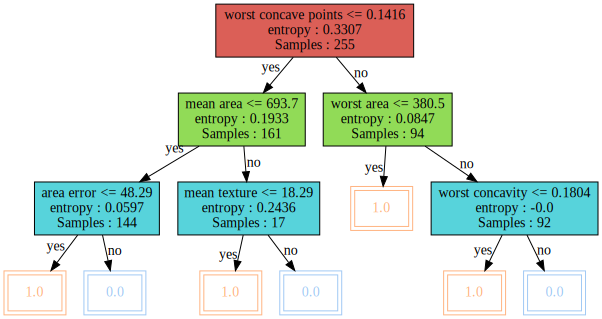

In [ ]:
visualize_tree(clf.root)
# dot = visualize_tree(clf.root)
# dot.format = 'png'
# dot.render(filename='brc', directory='./', cleanup=True)

## Pruning

In [ ]:
alpha_list, pruned_tree_list = pruning(clf, X_train, y_train)

## Use a Validation Set

In [ ]:
cost_vals = getCostValues(pruned_tree_list, X_val, y_val, clf.tree_type)

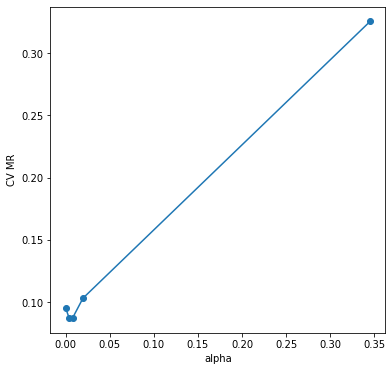

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.set_facecolor('white')
plt.plot(alpha_list, cost_vals, marker='o')
plt.xlabel('alpha')
plt.ylabel('CV MR')
plt.show()

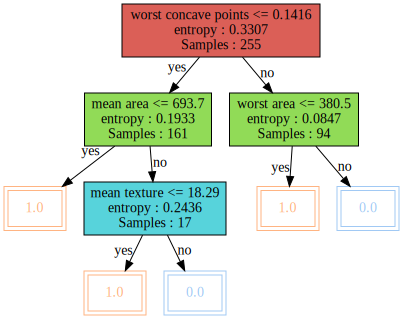

In [ ]:
final_tree = pruned_tree_list[np.argmin(cost_vals)]
visualize_tree(final_tree)
# dot = visualize_tree(final_tree)
# dot.format = 'png'
# dot.render(filename='brc', directory='./', cleanup=True)

In [ ]:
dt = DecisionTree()
dt.root = final_tree
predict = dt.predict(X_test)
accuracy = sum(y_test == predict)/len(y_test)
print(accuracy)

0.9521276595744681


## Boston Load Dataset

In [ ]:
lb = load_boston()
df = pd.DataFrame(lb.data, columns=lb.feature_names)
df['MEDV'] = lb.target
X = df[[col for col in df.columns if col != 'MEDV']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.33, random_state=42)        
reg = DecisionTree(tree_type = 'regression')
reg.fit(X_train,y_train,impurity_measure='mse',max_depth=4)

In [ ]:
## not pruned
predict = reg.predict(X_test)
mse = sum(np.square(y_test - predict))/len(y_test)
print(mse)

43.13576467065868


In [ ]:
# visualize_tree(reg.root)
dot = visualize_tree(reg.root)
dot.format = 'png'
dot.render(filename='boston', directory='./', cleanup=True)

'.\\boston.png'

In [ ]:
alpha_list, pruned_tree_list = pruning(reg, X_train, y_train)
cost_vals = getCostValues(pruned_tree_list, X_val, y_val, reg.tree_type)

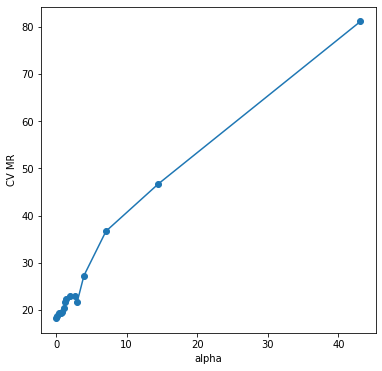

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.set_facecolor('white')
plt.plot(alpha_list, cost_vals, marker='o')
plt.xlabel('alpha')
plt.ylabel('CV MR')
plt.show()

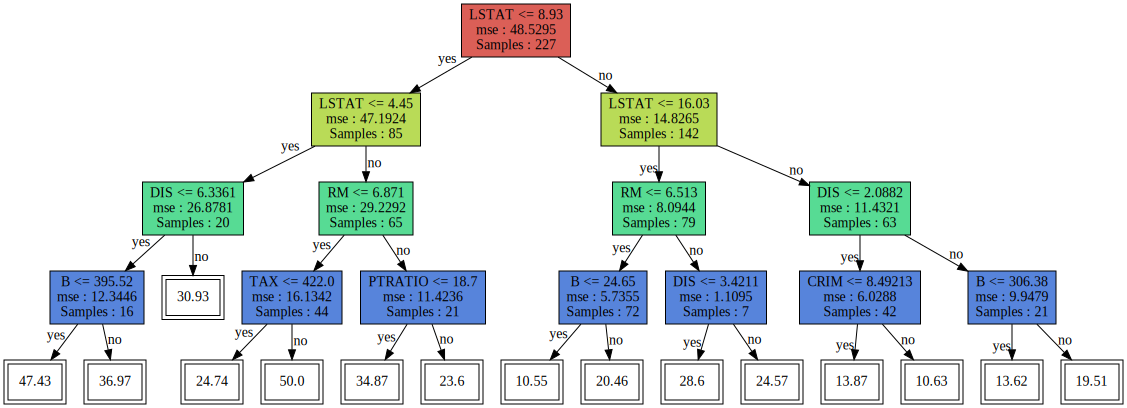

In [ ]:
final_tree = pruned_tree_list[np.argmin(cost_vals)]
visualize_tree(final_tree)
# dot = visualize_tree(final_tree)
# dot.format = 'png'
# dot.render(filename='boston', directory='./', cleanup=True)

In [ ]:
dt = DecisionTree('regression')
dt.root = final_tree
predict = dt.predict(X_test)
mse = sum(np.square(y_test-predict))/len(y_test)
print(mse)

43.13576467065868


# Reduced Error Pruning

## Model

In [ ]:
df = pd.read_csv('../dataset/titanic.csv')
median_age = df['Age'].median()
mode_embarked = df['Embarked'].mode()[0]
df = df.fillna({'Age':median_age, 'Embarked':mode_embarked})

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.33, random_state=42)
X_val = X_val.reset_index(drop=True)
# y_val = y_val.reset_index(drop=True)
clf = DecisionTree()
clf.fit(X_train,y_train, min_sample=5, max_depth=4)
pruned_tree = clf.pruning(clf.root, X_val, y_val)

In [ ]:
predict = clf.predict(X_test)
accuracy = sum(y_test== predict)/len(y_test)
print(accuracy)

0.8033898305084746


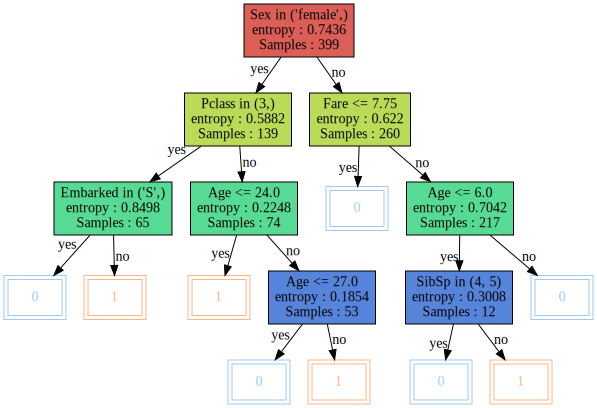

In [ ]:
visualize_tree(clf.root)
# dot = visualize_tree(clf.root)
# dot.format = 'png'
# dot.render(filename='ttrep', directory='./', cleanup=True)

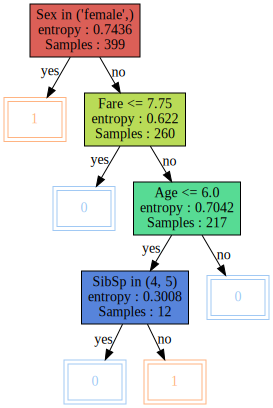

In [ ]:
visualize_tree(pruned_tree)
# dot = visualize_tree(pruned_tree)
# dot.format = 'png'
# dot.render(filename='ttreppp', directory='./', cleanup=True)

In [ ]:
dt = DecisionTree()
dt.root = pruned_tree
predict = dt.predict(X_test)
accuracy = sum(y_test== predict)/len(y_test)
print(accuracy)

0.8067796610169492


## Boston Load Dataset

In [ ]:
lb = load_boston()
df = pd.DataFrame(lb.data, columns=lb.feature_names)
df['MEDV'] = lb.target
X = df[[col for col in df.columns if col != 'MEDV']]
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.33, random_state=42)        
X_val = X_val.reset_index(drop=True)
# y_val = y_val.values
reg = DecisionTree(tree_type = 'regression')
reg.fit(X_train,y_train,impurity_measure='mse',max_depth=4)

In [ ]:
## not pruned
predict = reg.predict(X_test)
mse = sum(np.square(y_test - predict))/len(y_test)
print(mse)

43.13576467065868


In [ ]:
pruned_tree = reg.pruning(reg.root, X_val, y_val)

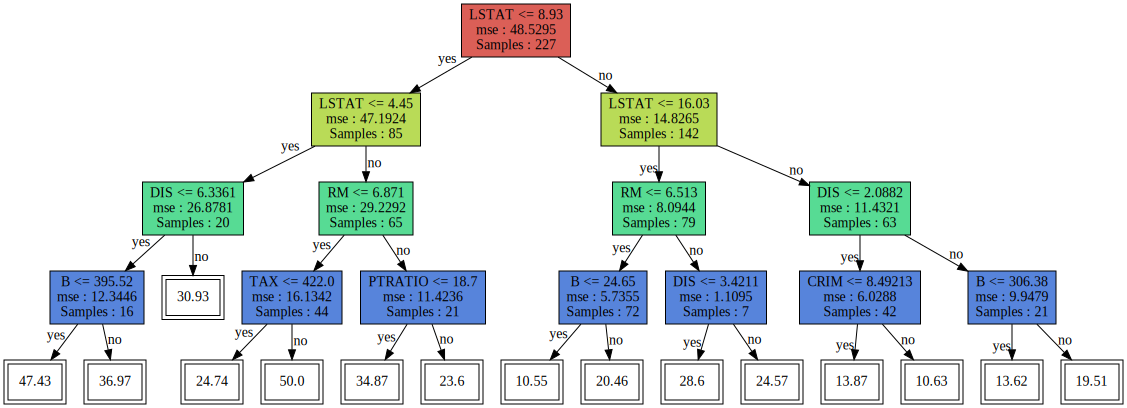

In [ ]:
visualize_tree(reg.root)

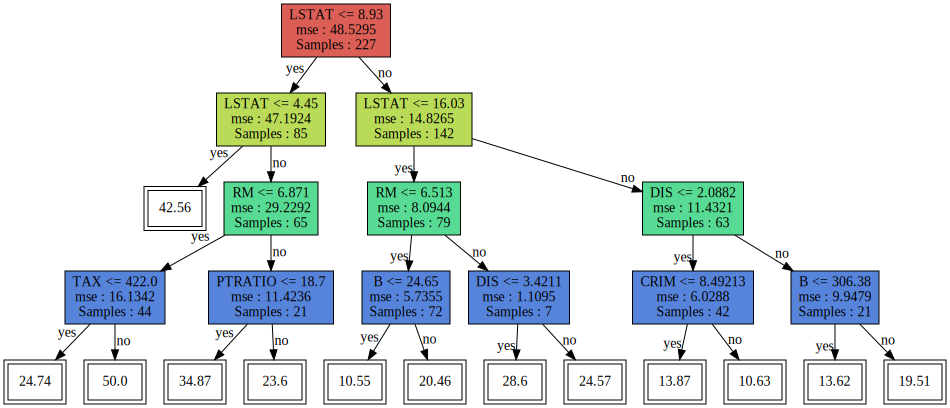

In [ ]:
visualize_tree(pruned_tree)
# dot = visualize_tree(pruned_tree)
# dot.format = 'png'
# dot.render(filename='ttreppp', directory='./', cleanup=True)

In [ ]:
## not pruned
dt = DecisionTree('regression')
dt.root = pruned_tree
predict = dt.predict(X_test)
mse = sum(np.square(y_test - predict))/len(y_test)
print(mse)

43.43359161676646
